# Predicting the score using simple linear regression

In [1]:
#importing the libraries 
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data from the given link
link = "http://bit.ly/w-data"
dataset = pd.read_csv(link)

In [3]:
# printing the dataset 
print(dataset)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

# Cheking For NULL Values

In [5]:
dataset.isnull().sum() 

Hours     0
Scores    0
dtype: int64

# Covarience Matrix and Heatmap 

          Hours      Scores
Hours    6.3761   62.331500
Scores  62.3315  639.426667


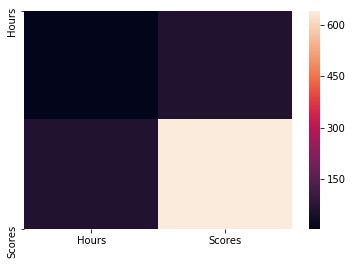

In [6]:
covMatrix = pd.DataFrame.cov(dataset)
print (covMatrix)
import seaborn as sns 
sns.heatmap(covMatrix) # As we see the Hours and Scores are Highly correlated

Text(0.5, 1.0, 'Hours vs Score')

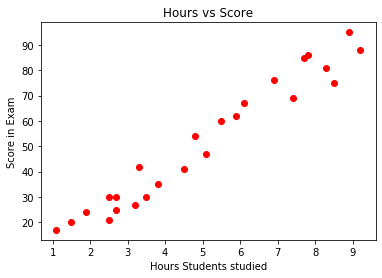

In [7]:
#plot Graph of Hours vs Score
plt.scatter(dataset['Hours'] ,dataset['Scores'] , color = 'red')
plt.xlabel('Hours Students studied')
plt.ylabel('Score in Exam')
plt.title("Hours vs Score")

In [8]:
# take X and y columns 
X = dataset.iloc[ : , :-1].values 
y = dataset.iloc[ : , 1].values
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Only One Indenpendent Variable here, No categorical Variable, No missing values so no needed to Preprocessing More 
Splitting the data into trianning and test set

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.25, random_state = 1 )
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[7.4]
 [3.5]
 [3.2]
 [2.7]
 [9.2]
 [5.5]
 [3.8]
 [5.1]
 [2.5]
 [2.5]
 [8.9]
 [7.8]
 [6.9]
 [2.7]
 [8.3]
 [4.5]
 [5.9]
 [1.5]]
[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]
 [7.7]
 [6.1]]
[69 30 27 30 88 60 35 47 30 21 95 86 76 25 81 41 62 20]
[17 42 24 75 54 85 67]


In [10]:
# Train the trainning Set into Linear Regression Model 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred = regressor.predict(X_test)
print('Predicted data of test set\n' , y_pred)

Predicted data of test set
 [13.23705714 34.74382459 21.05769985 85.57800223 49.40752968 77.75735951
 62.11607409]


# Prdicted Hours vs Actual Score

In [12]:
df = pd.DataFrame({'Predicted' : y_pred , 'Actual' : y_test})
df

,Predicted,Actual
0,13.237057,17
1,34.743825,42
2,21.057700,24
3,85.578002,75
4,49.407530,54
5,77.757360,85
6,62.116074,67


Checking the R2-Squared Score and Mean-Squared Error

In [13]:
#R-Squared score 
from sklearn.metrics import r2_score
print("R-Squred Score is ",r2_score(y_test, y_pred))

R-Squred Score is  0.9280175836835023


In [14]:
from sklearn.metrics import mean_squared_error
print('mean_squared_error is', mean_squared_error(y_test , y_pred))

mean_squared_error is 40.680348421152125


Predict the Score For 9.25 Hours

In [15]:
#  the 92.80% of the variance for a dependent variable that's explained by an independent variable
Data = 9.25 
print("Student will Score After 9.25 Hours of Study :", regressor.predict([[9.25]]))

Student will Score After 9.25 Hours of Study : [92.90985477]


Text(0.5, 1.0, 'Hours vs Score')

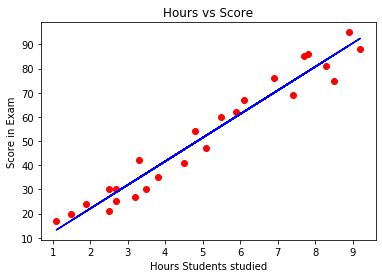

In [16]:
plt.scatter(X, y, color='Red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.xlabel('Hours Students studied')
plt.ylabel('Score in Exam')
plt.title("Hours vs Score")

In [17]:
print('line Equation is y = m*',regressor.coef_,'+', regressor.intercept_)

line Equation is y = m* [9.77580339] + 2.483673405373196
